In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#loading the data set from csv file to a Pandas DataFrame
wine_data = pd.read_csv('/content/winequality-red.csv',delimiter=';')
#First 10 rows of data sets
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
quality_binary             0.095093         -0.321441     0.159129   


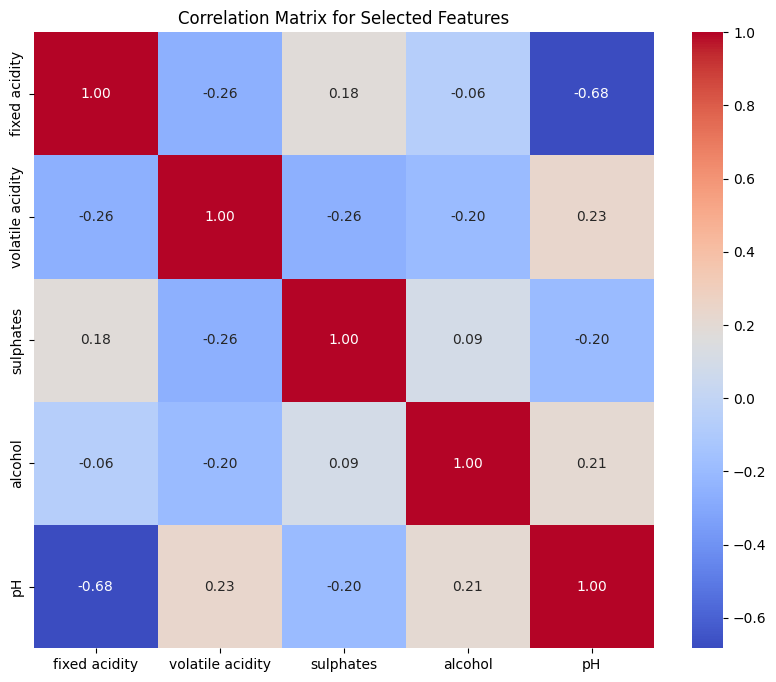

Generating pair plots...


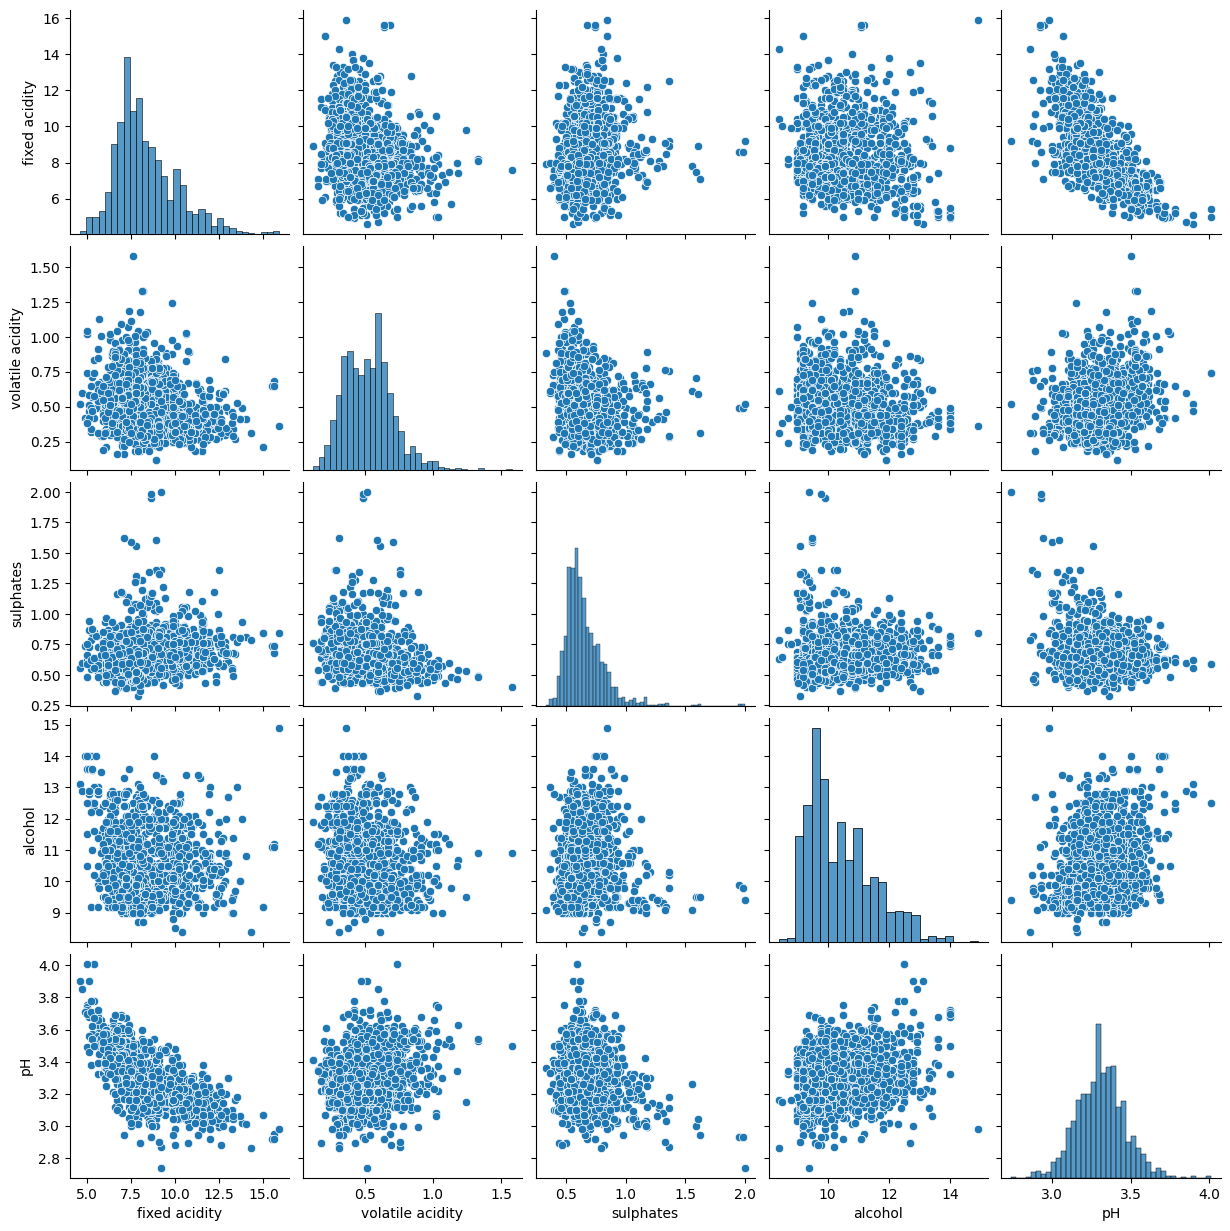

In [ ]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Selecting a subset of features for pair plot
selected_features = wine_data[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'pH']]
# Generate a heatmap for the correlation matrix
corr_matrix = selected_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Selected Features')
plt.show()

# Create pair plots
print("Generating pair plots...")
pair_plot = sns.pairplot(selected_features)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Binarize the 'quality' variable: 1 for high (6 to 8) and 0 for low (3 to 5)
wine_data['quality_binary'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Define features and target
X = wine_data.drop(['quality', 'quality_binary','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','citric acid'], axis=1)
y = wine_data['quality_binary']

from sklearn.preprocessing import StandardScaler
# Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate logistic regression model using 'saga' solver
logreg_saga = LogisticRegression(solver='saga', max_iter=1000)
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)
print("Accuracy with 'saga':", accuracy_saga)
print(logreg_saga.coef_, logreg_saga.intercept_)


Accuracy with 'saga': 0.725
[[ 0.02296144 -2.51970211 -0.61646784  1.38422313  0.9825395 ]] [-7.74332506]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import statsmodels.api as sm

# Add a constant to X_train_scaled for the intercept in the model
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         quality_binary   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1273
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.2194
Time:                        19:57:54   Log-Likelihood:                -690.42
converged:                       True   LL-Null:                       -884.45
Covariance Type:            nonrobust   LLR p-value:                 1.110e-81
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.1502      2.394     -5.493      0.000     -17.842      -8.458
fixed acidi